### Introduction to Thin Films Calculations



In [1]:
import optiland.backend as be
from optiland.thin_film import ThinFilmStack, SpectralAnalyzer
from optiland.materials import Material, IdealMaterial

In [2]:
SiO2 = Material("SiO2", reference="Gao")
TiO2 = Material("TiO2", reference="Zhukovsky")
BK7 = Material("N-BK7", reference="SCHOTT")
air = IdealMaterial(n=1.0)

In [3]:
stack = ThinFilmStack(incident_material=air, substrate_material=BK7, reference_wl_um=0.6)
for _ in range(10):
    stack.add_layer_qwot(material=TiO2,qwot_thickness=1.0, name="TiO$_2$")
    stack.add_layer_qwot(material=SiO2, qwot_thickness=1.0, name="SiO$_2$")

# stack.plot_structure()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\lambda$ ($\\mu$m)', ylabel='Power fraction'>)

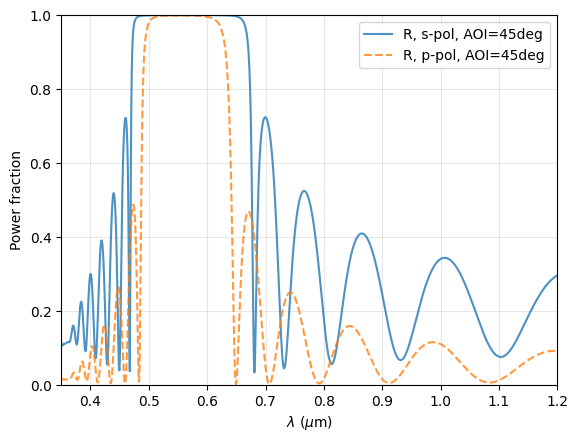

In [ ]:
wl = be.linspace(0.35, 1.2, 1000)
angles = be.linspace(0, 80, 200)
analyzer = SpectralAnalyzer(stack=stack)

# Exemple avec plusieurs polarisations en même temps
analyzer.wavelength_view(wl, wavelength_unit='um', aoi=45, to_plot=["R"], polarization=["s", "p"])

In [ ]:
# Exemple de visualisation avec multiples polarisations et unités
import matplotlib.pyplot as plt

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Réflectance vs longueur d'onde (nm) avec polarisations s et p
wl_nm = be.linspace(400, 800, 200)
analyzer.wavelength_view(wl_nm, wavelength_unit='nm', aoi=45, 
                        polarization=["s", "p"], to_plot="R", ax=axes[0,0])
axes[0,0].set_title("Réflectance vs λ (nm) - AOI 45°")

# 2. Réflectance vs énergie (eV) avec toutes les polarisations
wl_um = be.linspace(0.4, 0.8, 200)
energies_ev = (4.136e-15 * 2.998e8) / (wl_um * 1e-6)  # Conversion en eV
analyzer.wavelength_view(energies_ev, wavelength_unit='energy', aoi=0, 
                        polarization=["s", "p", "u"], to_plot="R", ax=axes[0,1])
axes[0,1].set_title("Réflectance vs Énergie (eV) - AOI 0°")

# 3. Réflectance vs angle d'incidence avec polarisations s et p
angles = be.linspace(0, 80, 100)
analyzer.angular_view(angles, wavelength=550, wavelength_unit='nm',
                     polarization=["s", "p"], to_plot="R", ax=axes[1,0])
axes[1,0].set_title("Réflectance vs Angle - λ=550nm")

# 4. Transmittance vs nombre d'onde (cm⁻¹) avec polarisations s et p
wavenumbers = be.linspace(12500, 25000, 200)  # 400-800 nm en cm⁻¹
analyzer.wavelength_view(wavenumbers, wavelength_unit='wavenumber', aoi=30,
                        polarization=["s", "p"], to_plot="T", ax=axes[1,1])
axes[1,1].set_title("Transmittance vs Nombre d'onde (cm⁻¹) - AOI 30°")

plt.tight_layout()
plt.show()